Importing dependencies

In [4]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from helper import plot_multi

ModuleNotFoundError: No module named 'helper'

API login

In [ ]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

Importing data

In [3]:
raw_df = te.getHistorical(symbol=['KO:US', 'PEP:US'], initDate='2020-01-01')
coca_cola = raw_df.loc[raw_df['Symbol'] == 'KO:US']
pepsico = raw_df.loc[raw_df['Symbol'] == 'PEP:US']

Data manipulation

In [4]:
coca_cola = coca_cola[['Date', 'Close']].rename(columns={'Close': 'Coca-Cola'}, inplace=False)
pepsico = pepsico[['Date', 'Close']].rename(columns={'Close': 'PepsiCo'}, inplace=False)

df = pd.merge(coca_cola, pepsico, on='Date')

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

df.sort_values(['Date'], inplace=True)
df.set_index('Date', inplace=True)

df

,Coca-Cola,PepsiCo
Date,,
2020-01-08,54.35,134.690
2020-01-09,55.34,134.730
2020-01-10,55.53,134.520
2020-01-13,56.13,136.525
2020-01-14,56.00,136.595
...,...,...
2020-12-11,53.35,144.970
2020-12-14,53.27,144.230
2020-12-15,53.84,144.770


Plotting

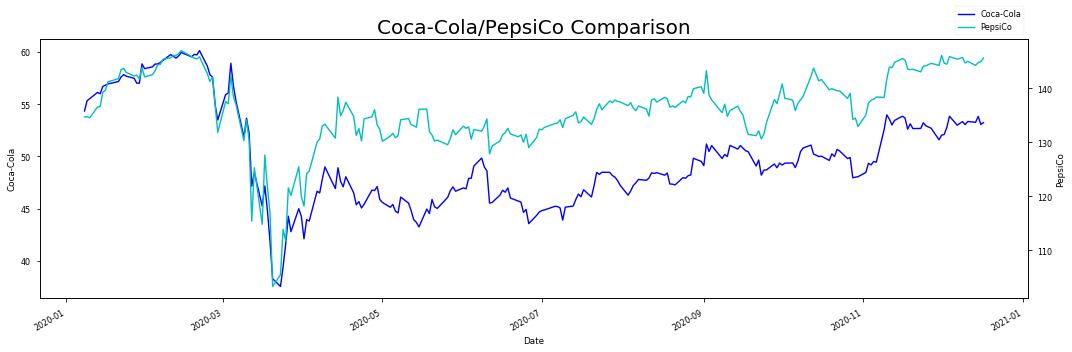

In [5]:
plt.style.use('seaborn-paper')
ax = plot_multi(df, figsize=(15, 5))
ax.set_title('Coca-Cola/PepsiCo Comparison', color='black', size=20)
plt.tight_layout()